In [1]:
# import necessary libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset into a pandas DataFrame
df = pd.read_csv('dermatology.csv', delimiter='\t')

# convert 'Age' column to numeric for prepare to categorization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# categorize the 'Age' column as age is continuous
for i in range(len(df)):
    age = df.iloc[i]['Age']
    
    if age == '?':
        df.iloc[i, df.columns.get_loc('Age')] = None 
        continue
        
    category = 0
    if 18 < age <= 35:
        category = 1
    elif age <= 50:
        category = 2
    elif age <= 65:
        category = 3
    elif age <= 125:
        category = 4
    df.iloc[i, df.columns.get_loc('Age')] = category

# clean the dataset for missing and NaN values
df = df.dropna()

# print the first five entries
print(df.head())

   Erythema  Scathing  Definite Borders  Itching  Koebner   Polygonal  \
0         2         2                 0        3         0          0   
1         3         3                 3        2         1          0   
2         2         1                 2        3         1          3   
3         2         2                 2        0         0          0   
4         2         3                 2        2         2          2   

   Follicular  Oral  Knee  Scalp  ...  Disapperance  Vacuolisation  \
0           0     0     1      0  ...             0              0   
1           0     0     1      1  ...             0              0   
2           0     3     0      0  ...             0              2   
3           0     0     3      2  ...             3              0   
4           0     2     0      0  ...             2              3   

   Spongiosis  Retes  Follicular.1  Perifollicular  Inflamatory  Band-like  \
0           3      0             0               0            

In [3]:
# define the independent (feature) variables
X = df.iloc[:, :-1].values

# define the dependent (target) variable
y = df.iloc[:, -1].values

# split the dataset into 70% training and 30% testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k= 1  Accuracy= 0.9363636363636364
k= 3  Accuracy= 0.9818181818181818
k= 5  Accuracy= 0.9818181818181818
k= 7  Accuracy= 0.990909090909091
k= 9  Accuracy= 0.990909090909091
k= 11  Accuracy= 0.990909090909091
k= 13  Accuracy= 0.990909090909091
k= 15  Accuracy= 0.9818181818181818
k= 17  Accuracy= 0.9818181818181818
k= 19  Accuracy= 0.9727272727272728
k= 21  Accuracy= 0.9727272727272728
k= 23  Accuracy= 0.9727272727272728
k= 25  Accuracy= 0.9818181818181818
k= 27  Accuracy= 0.9727272727272728
k= 29  Accuracy= 0.9818181818181818
k= 31  Accuracy= 0.9727272727272728
k= 33  Accuracy= 0.9727272727272728
k= 35  Accuracy= 0.9727272727272728
k= 37  Accuracy= 0.9636363636363636
k= 39  Accuracy= 0.9636363636363636
k= 41  Accuracy= 0.9727272727272728
k= 43  Accuracy= 0.9636363636363636
k= 45  Accuracy= 0.9545454545454546
k= 47  Accuracy= 0.9636363636363636
k= 49  Accuracy= 0.9545454545454546


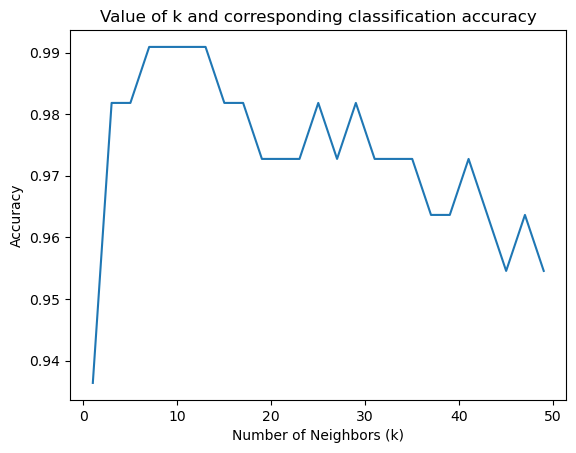

In [4]:
# empty list to hold k values and accuracy scores for future plotting
res = []

# train different kNN models with k values ranging from 1-49 to find best accuracies
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)  # instance of kNN model with k neighbors
    classifier.fit(X_train, y_train)  # fit the classifier
    prediction = classifier.predict(X_test)  # make predictions on the test set
    accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test) # calculate accuracy
    print("k=", k, " Accuracy=", accuracy)
    res.append([k, accuracy]) # store results for plotting

# convert res list to a DataFrame for plotting
res = pd.DataFrame(res, columns=['k', 'accuracy'])

# plot the accuracy values against the different values of k
plt.plot(res.k, res.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()